# Understanding Descriptive Statistics

Import the necessary libraries here:

In [37]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [38]:
# your code here
import random

def roll_dice(n):
    lst = []
    for i in range(n):
        roll = (random.randint(1,6))
        lst.append(roll)
    df = pd.DataFrame(lst,range(1,n+1))
    df.reset_index(inplace=True)
    df.columns = ['Roll','Dice']
    return df
roll_dice(10)

,Roll,Dice
0,1,1
1,2,3
2,3,3
3,4,1
4,5,3
5,6,3
6,7,2
7,8,4
8,9,2
9,10,3


#### 2.- Plot the results sorted by value.

In [39]:
# your code here
results = roll_dice(10).sort_values('Dice', ascending=False)
results

,Roll,Dice
2,3,6
3,4,6
6,7,6
7,8,4
0,1,3
4,5,3
8,9,3
5,6,2
9,10,2
1,2,1


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

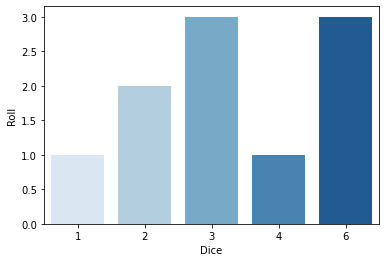

In [76]:
# your code here

# frequency distribution
freq = results.groupby('Dice').count()
data=freq.reset_index()
plot = sns.barplot(x='Dice', y='Roll', data=data, palette = 'Blues')

In [71]:
data.sort_values('Roll', ascending = False)

,Dice,Roll
2,3,3
4,6,3
1,2,2
0,1,1
3,4,1


## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [83]:
# your code here  data, index
def mean_dice(data, index):
    columns = data.columns
    mean = data[columns[index]].sum()/data[columns[index]].count()
    return mean
# the average of the Dice column
mean_dice(data, 0)

3.2

In [77]:
data.columns

Index(['Dice', 'Roll'], dtype='object')

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [84]:
# your code here

mean_dice(data,1)

2.0

In [85]:
data

,Dice,Roll
0,1,1
1,2,2
2,3,3
3,4,1
4,6,3


In [88]:
len(data)

5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [89]:
# your code here

def median_calculation(data):
    if len(data['Dice']) % 2 == 0:
        return (data['Dice'][len(data) // 2-1] + df['Dice'][(len(data) // 2)]) / 2
    return data['Dice'][(len(data) // 2)]

median_calculation(data)

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [99]:
# your code here
def quartiles(data):
    x = median_calculation(data)
    Q = data['Dice'].quantile([0.25,0.5,0.75])
    return Q
quartiles(data)

0.25    2.0
0.50    3.0
0.75    4.0
Name: Dice, dtype: float64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [124]:
# your code here
rtd = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_4_Descriptive-Statistics/roll_the_dice_hundred.csv', index_col=0)
rtd.sort_values('value', ascending=True, inplace=True)
rtd

,roll,value
0,0,1
47,47,1
56,56,1
9,9,1
73,73,1
...,...,...
17,17,6
11,11,6
24,24,6
21,21,6


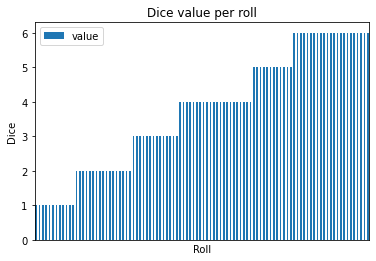

In [156]:
rtd[['value']].plot(kind='bar')
plt.tick_params(labelbottom = False, bottom = False)
plt.xlabel('Roll')
plt.ylabel('Dice')
plt.title('Dice value per roll')
plt.show()

In [157]:
"""
Need to use "index_col = 0" to remove the "unnamed" column
"""

'\nNeed to use "index_col = 0" to remove the "unnamed" column\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [127]:
# your code here
mean_dice(rtd, 1)

3.74

#### 3.- Now, calculate the frequency distribution.


In [162]:
# your code here
freq = rtd.groupby('value')['roll'].count().reset_index()
freq

,value,roll
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


In [172]:
freq.columns

Index(['value', 'roll'], dtype='object')

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

Text(0.5, 1.0, 'Dice Value vs Total Times')

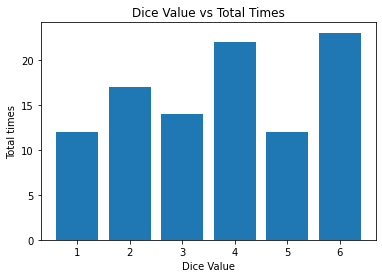

In [220]:
# your code here
plt.bar(freq['value'],freq['roll'])
plt.xlabel('Dice Value')
plt.ylabel('Total times')
plt.title('Dice Value vs Total Times')

In [51]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

Text(0.5, 1.0, 'Dice Value vs Total Times')

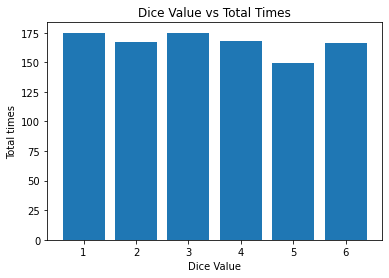

In [221]:
# your code here
rtdt = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_4_Descriptive-Statistics/roll_the_dice_thousand.csv', index_col=0)
rtdt.sort_values('value')

freq_d = rtdt.groupby('value')['roll'].count().reset_index()
freq_d

plt.bar(freq_d['value'], freq_d['roll'])
plt.xlabel('Dice Value')
plt.ylabel('Total times')
plt.title('Dice Value vs Total Times')

In [222]:
"""
The distribution became more even due to much more times of rolls
"""

'\nThe distribution became more even due to much more times of rolls\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

Text(0, 0.5, 'count')

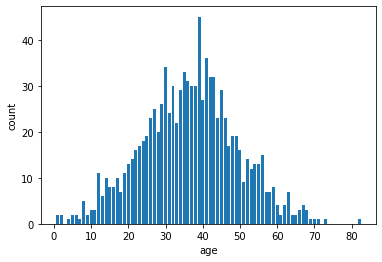

In [281]:
# your code here
agp = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_4_Descriptive-Statistics/ages_population.csv')
distribution = agp.groupby('observation').agg({'observation':'count'})
distribution.columns = ['count']
distribution['age'] = distribution.index
plt.bar(distribution['age'], distribution['count'])
plt.xlabel('age')
plt.ylabel('count')

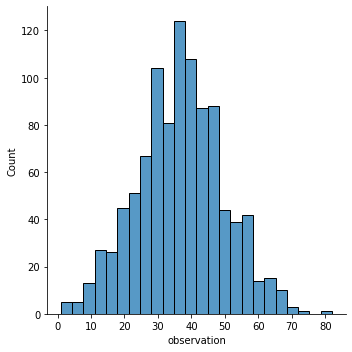

In [280]:
# alternative

sns.displot(agp['observation'])

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [283]:
# your code here

# mean: 36.56
agp.mean()

# std: 12.8165
agp.std()

observation    12.8165
dtype: float64

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

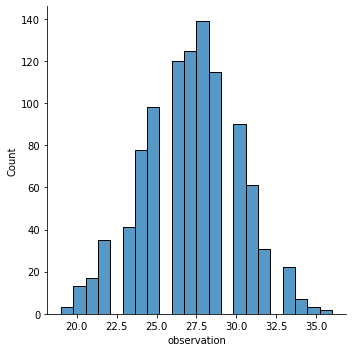

In [285]:
# your code here
agp2 = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_4_Descriptive-Statistics/ages_population2.csv')
sns.displot(agp2['observation'])

In [292]:
agp2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [293]:
"""
Only ages within 20-36
"""

'\nOnly ages within 20-36\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [296]:
# your code here

# mean: 27.155
agp2.mean()

# std: 2.97
agp2.std()

observation    2.969814
dtype: float64

In [297]:
"""
Smaller mean and smaller std, data less dispersed
"""

'\nSmaller mean and smaller std, data less dispersed\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [301]:
# your code here
ag3 = pd.read_csv(r'/Users/tinghaokao/Desktop/IronHackDA/DAFT_212/module_2/Lab_4_Descriptive-Statistics/ages_population3.csv')
ag3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

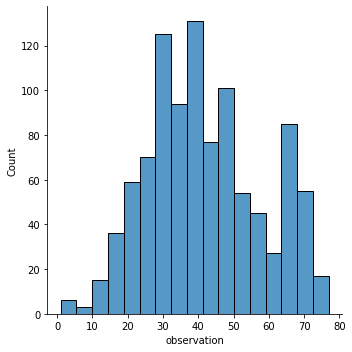

In [303]:
sns.displot(ag3['observation'])

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [305]:
# your code here

# mean: 42
ag3.mean()

# std: 16.14
ag3.std()

observation    16.144706
dtype: float64

In [306]:
"""
bigger mean and std
"""

'\nbigger mean and std\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [307]:
# your code here
ag3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [309]:
ag3.median()

# difference = 42-40 =2

observation    40.0
dtype: float64

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [313]:
# your code here

others = ag3['observation'].quantile([0,0.2,0.4,0.6,0.8,1])
others

0.0     1.0
0.2    28.0
0.4    36.0
0.6    45.0
0.8    57.0
1.0    77.0
Name: observation, dtype: float64